# Homework 1 Code

In [4]:
# Add import statements here
import numpy as np
import matplotlib.pyplot as plt 
from numpy import linalg as LA

## Perceptron Learning

The `perceptron_learn` function runs the Perceptron Learning Algorithm on input data.

Inputs: 
* `data_in` is a matrix with each row representing an $(x, y)$ pair; the $x$ vector is augmented with a leading 1, the label, $y$, is in the last column. 
Outputs:
The function outputs a tuple, `(w, iterations)`, where: 
* `w` is the learned weight vector; it should linearly separate the data if it is linearly separable.
* `iterations` is the number of iterations the algorithm ran for. 

In [3]:
def same(a, b):
    for i in range(len(a)):
        if a[i] != b[i]:
            return False
    return True
        
def firstDifIndex(a, b):
    for i in range(len(a)):
        if a[i] != b[i]:
            return i
        
def hyp(w, x):
    val = np.dot(w, x.transpose())
    return np.sign(val)
    
def perceptron_learn(data_in):
    x = data_in[:, 0:-1]
    y = data_in[:, -1].reshape(len(data_in),1)
    w = np.zeros(shape=len(x[0]))

    iterations = 0
    
    h = hyp(w,x)
    while not same(h, y):
        # for a row such that x is not equal
        i = firstDifIndex(h, y)
        w = w + y[i]*x[i]
        h = hyp(w, x)
        iterations += 1

    return w, iterations

In [4]:
# dummy test data
# w_star = np.random.rand(1, 2)
# w_star = np.insert(w_star, 0, 0, axis=1) #add 0 as first dimension

# # print("w_star", w_star)

# training = np.random.uniform(-1, 1, (5, 2))
# training = np.insert(training, 0, 1, axis=1) #add 1 as first dimension to each example

# y = np.sign(np.dot(w_star, training.transpose()))
# matrix = np.insert(training, len(training[0]), y, axis=1) #make y the last column

# # print("matrix\n", matrix)

# w, it = perceptron_learn(matrix)
# print(w)
# it

# a = [[1,2,3],
#     [2,3,4],
#     [3,4,5]]

# b = LA.norm(a, axis=1)
# print("b", b)
# c = np.max(b)
# c

# Perceptron Experiment
Code for running the perceptron experiment in HW1. 

Inputs: 
* `N` is the number of training examples
* `d` is the dimensionality of each example (before adding the 1)
* `num_samples` is the number of times to repeat the experiment

Outputs:
* `num_iters` is the number of iterations the Perceptron Learning Algorithm takes for each sample
* `bound_minus_ni` is the difference between the theoretical bound and the actual number of iterations

Both outputs should be `num_samples` long.

In [65]:
def perceptron_experiment(N, d, num_samples):

    # Your code here, assign the values to num_iters and bounds_minus_ni:
    num_iters = []
    weights = []
    bounds = []
    
    for sample in range(num_samples):
        # generate a new sample
        w_star = np.insert(np.random.rand(1, d), 0, 0, axis=1) #add 0 as first dimension
        training = np.insert(np.random.uniform(-1, 1, (N, d)), 0, 1, axis=1) #add 1 as first dimension to each example
        y = np.sign(np.dot(w_star, training.transpose()))
        matrix = np.insert(training, len(training[0]), y, axis=1) #make y the last column
        
        # calculate weights and # of iterations
        w, its = perceptron_learn(matrix)
        
        weights.append(w)
        num_iters.append(its)
        
        # calculate bound for each sample
        R_2 = np.max(LA.norm(training, axis=1))**2
        w_star_2 = LA.norm(w_star)**2
        rho_2 = np.min(np.dot(w_star, training.transpose()))**2
        bound = (R_2*w_star_2) / rho_2
        
        bounds.append(bound)
        
    bounds_minus_ni = [np.abs(a - b) for a, b in zip(bounds, num_iters)]

    return num_iters, bounds_minus_ni

## Run and Plot

Run the code below

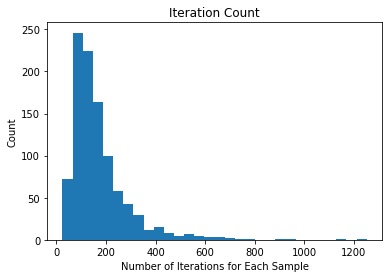

In [66]:
num_iters, bounds_minus_ni = perceptron_experiment(100, 10, 1000)

plt.hist(num_iters, bins = 30)
plt.title('Iteration Count')
plt.xlabel('Number of Iterations for Each Sample')
plt.ylabel('Count')
plt.show()

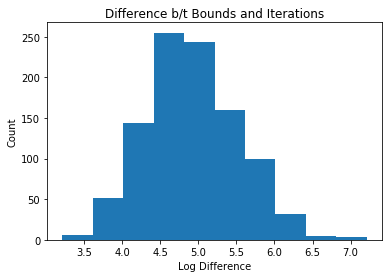

In [54]:
plt.hist(np.log(bounds_minus_ni), bins = 10)
plt.title('Difference b/t Bounds and Iterations')
plt.xlabel('Log Difference')
plt.ylabel('Count')
plt.show()

# Interpretation

The difference is roughly normally distributed. This means the amount of time it takes for PLA to converge is roughly the same across iterations, it's going to be on average close to the mean. In conclusion,